In [2]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
from adjustText import adjust_text 
import matplotlib.pyplot as plt


In [3]:
!pip install datasets
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

In [ ]:
df_india=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()
df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"['sql', 'excel', 'word', 'powerpoint', 'outloo...","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,['sql'],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"['python', 'sql', 'excel', 'ms access', 'power...","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,['power bi'],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"['r', 'python', 'sql', 'sap', 'power bi', 'tab...","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"['sql', 'python', 'shell', 'sql server', 'tabl...","{'analyst_tools': ['tableau', 'microstrategy']..."


In [19]:
df_plot=df_india['job_location'].value_counts().head(10).to_frame().copy()
df_plot

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


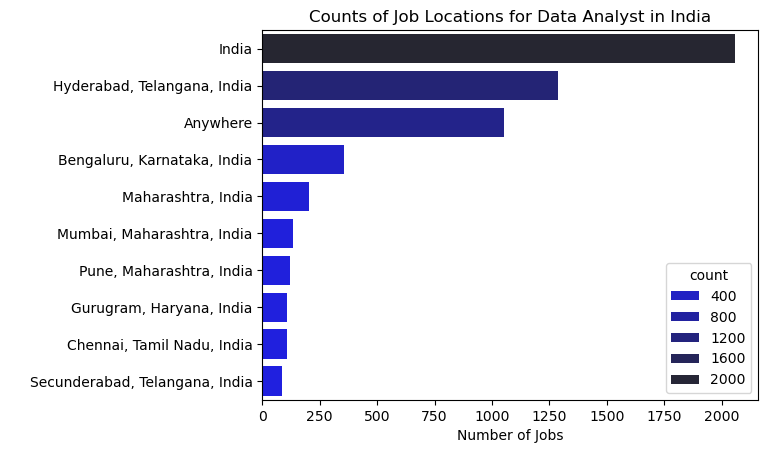

In [6]:
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r')
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.title('Counts of Job Locations for Data Analyst in India')
plt.show()

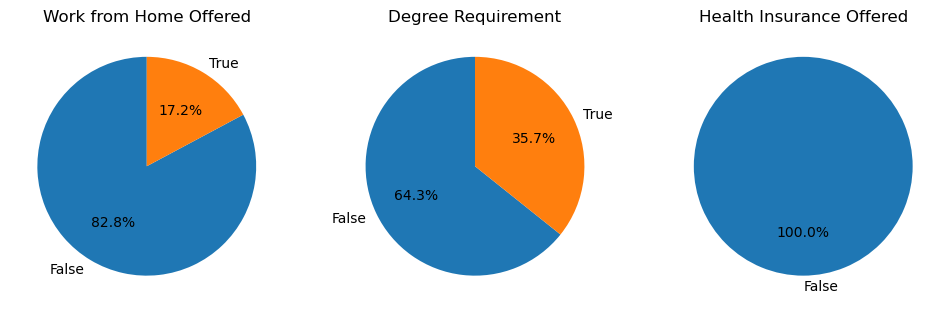

In [7]:
dict_column={
    'job_work_from_home':'Work from Home Offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}
fig,ax=plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_india[column].value_counts()
    ax[i].pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()


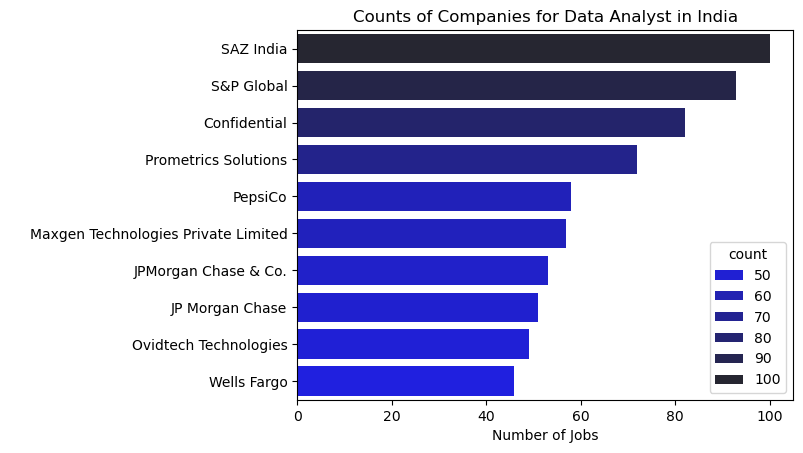

In [8]:
df_plot=df_india['company_name'].value_counts().head(10).to_frame().copy()
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r')
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.title('Counts of Companies for Data Analyst in India')
plt.show()

In [9]:
df_jobs=df[df['job_country']=='India'].copy()

In [10]:
#to convert job skiils column from string to list
def clean_list(skills):
    if pd.notna(skills):
        return ast.literal_eval(skills)
    
df_jobs['job_skills']=df_jobs['job_skills'].apply(clean_list)

In [11]:
df_explode=df_jobs.explode('job_skills')

In [12]:
df_skills=df_explode.groupby(['job_skills','job_title_short']).size()
df_skills=df_skills.reset_index(name='skill_count')
df_skills.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [13]:
job_titles=df_skills['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

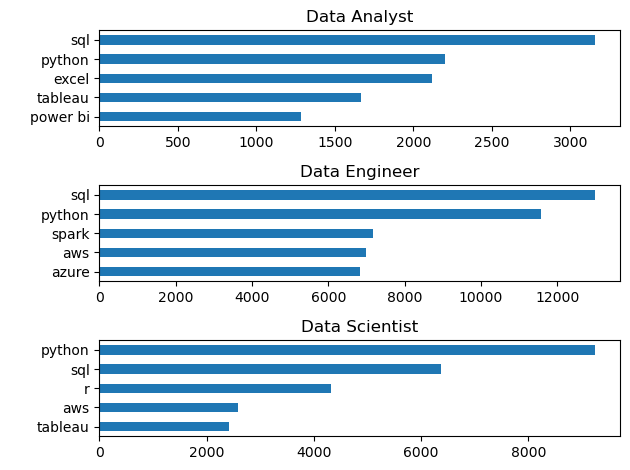

In [14]:
fig,ax=plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot=df_skills[df_skills['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel(' ')
    ax[i].legend().set_visible(False)
plt.tight_layout()

In [15]:
# % of skill in a job posting=(skill count in job posting)/(total number of job positions)
df_count=df_jobs['job_title_short'].value_counts().reset_index(name='jobs_total')

In [16]:
df_skills_perc=pd.merge(df_skills,df_count,how='left',on='job_title_short')

In [17]:
df_skills_perc['skill_percent']=100*df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


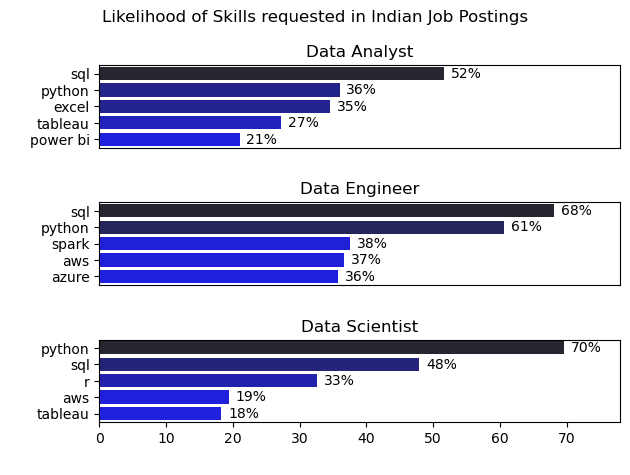

In [18]:
fig,ax=plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    #df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    # ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)
    for n,value in enumerate(df_plot['skill_percent']):
        ax[i].text(value+1,n,f'{value:.0f}%',va='center')
    if i!=len(job_titles)-1:
        ax[i].set_xticks([])
    
plt.tight_layout()
fig.suptitle('Likelihood of Skills requested in Indian Job Postings')
plt.tight_layout()